In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv(r'D:\analytics\data\Bank Marketing data sets.csv')

In [20]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [21]:
df.shape

(11162, 17)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [23]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [24]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [25]:
df.columns = df.columns.str.lower().str.strip()

In [26]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [27]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [28]:
#Deposit Subscription rate
df['deposit'].value_counts(normalize=True) *100 #(Majority customers donot subscribe)

no     52.616019
yes    47.383981
Name: deposit, dtype: float64

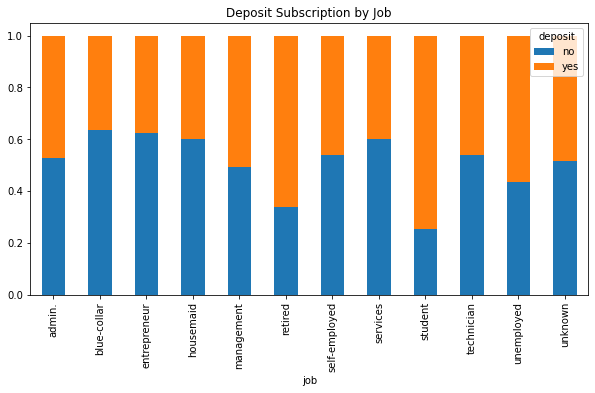

In [29]:
job_deposit = df.groupby('job')['deposit'].value_counts(normalize=True).unstack()
job_deposit.plot(kind = 'bar', stacked=True, figsize = (10,5))
plt.title("Deposit Subscription by Job")
plt.show()
#(normalize=True) → calculate percentage distribution
#.unstack() → turn deposit values (yes/no) into columns

Insight : Students and retired segments demonstrate higher deposit participation, whereas blue-collar and entrepreneur segments exhibit comparatively lower deposit levels.

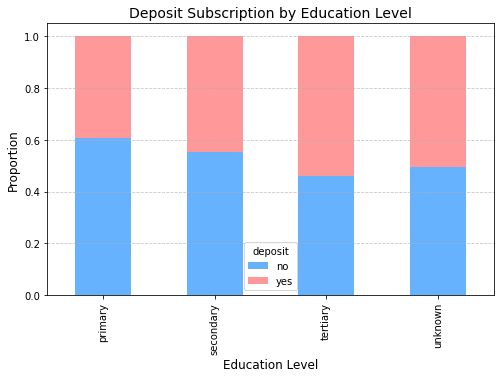

In [30]:
edu_deposit = df.groupby('education')['deposit'].value_counts(normalize = True).unstack()
edu_deposit.plot(kind='bar', stacked=True, color=['#66B2FF', '#FF9999'], figsize=(8,5))
plt.title('Deposit Subscription by Education Level', fontsize=14)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)


Insight : Primary education level demonstrate higher deposit participation, whereas tertiary exhibit comparatively lower deposit levels.

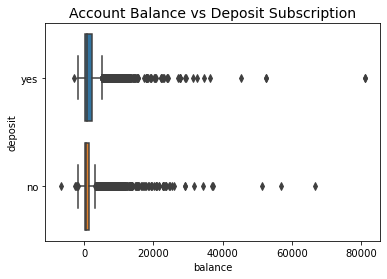

In [36]:
#Balance vs Deposit #A box plot especially useful for identifying spread, central tendency, and outliers
sns.boxplot(data = df, x='balance',y='deposit',)
plt.title("Account Balance vs Deposit Subscription", fontsize=14)
plt.show()

Insight: Most customers fall within a low range of values, but a small group of customers shows exceptionally high values, resulting in a right-skewed distribution. These high outliers may represent premium or highly engaged customers and should be analyzed separately.

-Most customers have small values, but a few have very large values. These customers are likely more interested and should be analyzed separately.

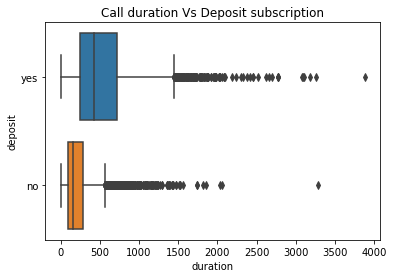

In [35]:
#Call Duration Analysis
sns.boxplot(data=df, x='duration', y='deposit')
plt.title('Call duration Vs Deposit subscription')
plt.show()

Insight: Customers who subscribed to a deposit usually had longer call durations, while customers with shorter call durations mostly did not subscribe.

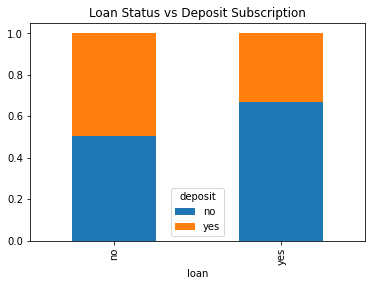

In [33]:
#Loan Impact
loan_deposit = df.groupby('loan')['deposit'].value_counts(normalize=True).unstack()
loan_deposit.plot(kind='bar', stacked=True)
plt.title("Loan Status vs Deposit Subscription")
plt.show()

Insight: Customers with existing loans convert less deposit, Safer financial profiles convert more